# Human population growth

For humans to live sustainably we must stabilize our population (definition of sustainable), but global population has grown dramatically since the industrial revolution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dataDir = '../DATA/world-population/'

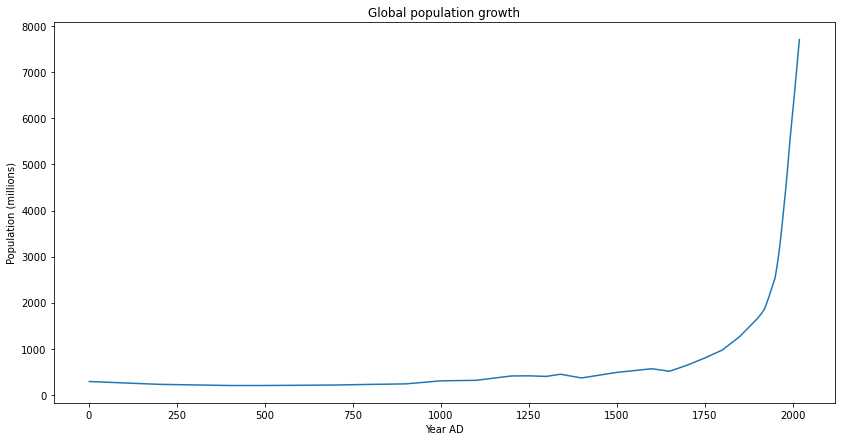

In [2]:
filename = dataDir + 'world_population_v2020.csv'

year,population = np.loadtxt(filename,usecols=(0,1),skiprows=1,unpack=True,delimiter=',')

plt.figure(figsize=[14,7])
plt.title('Global population growth')
plt.xlabel('Year AD')
plt.ylabel('Population (millions)')
plt.plot(year,population)
plt.show()

## Exponential growth?

The change in size of the population ($dN$) depends on a growth factor (probablility per unit time, $k$) that describes the net effect of an individual reproducing (increases population) or dying (reduces population), multiplied by the size of the population ($N$), multiplied by the length of time elapsed ($dt$). 

\begin{equation*}
dN = k N dt 
\end{equation*}

Rearranging gives

\begin{equation*}
k = \frac{dN}{N dt} 
\end{equation*}

So how has the growth factor varied through time?

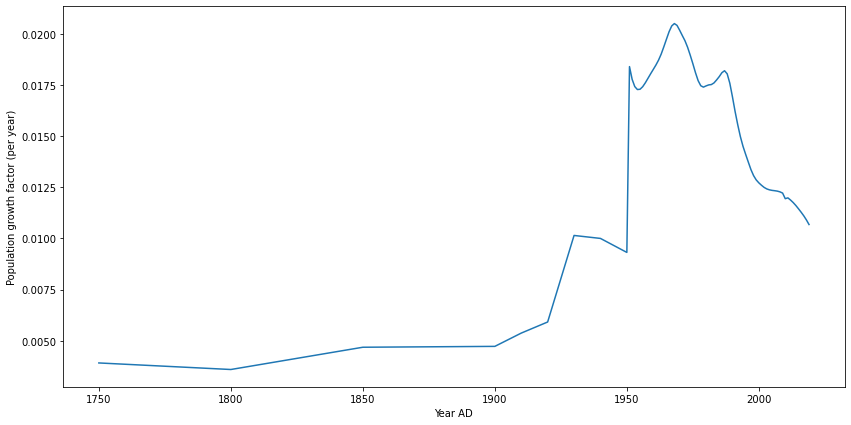

In [3]:
# The np.diff(ARG) function, produces output one element shorter than ARG
# so define new arrays missing the first element (called 'slicing' an array)
dN = np.diff(population)
N = population[1:]
dt = np.diff(year)
t = year[1:]

k = dN / (N * dt)

selection = (t > 1700)

plt.figure(figsize=[14,7])
plt.xlabel('Year AD')
plt.ylabel('Population growth factor (per year)')
plt.plot(t[selection],k[selection])
plt.show()

We see that the population growth rate factor was stable (near-perfect exponential growth) at about 0.4% per year from 1750 to 1900. Between 1880 and 1930, antibiotics were developed, and this is probably one factor (along with other technological advances) that led to a steady increase in the annual growth rate to 2% by 1965 (with some effect of the 1930-50 depression and Second World War). Advances in contraception and women's liberation in the 1960s in wealthy countries, along with proactive birth control measures in China (and then their one child policy) led to a steady reduction in population growth rate during the last 50 years.

What will the population growth rate be in future? A simplistic approach might be to linearly extrapolate the trend in growth rate factor over the past 50 years or so, which reflects technological advances (especially medical advances) and human choices (much harder to predict in future).

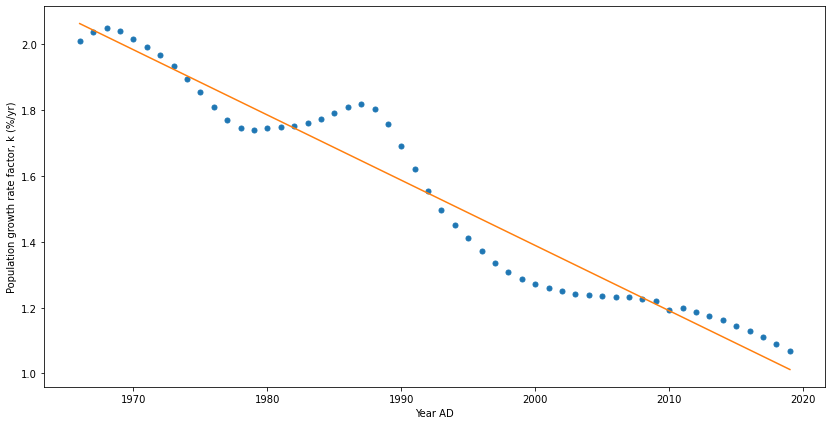

In [4]:
selection = t > 1965

kModelParameters = np.polyfit(t[selection],k[selection],1)

kModelFunc = np.poly1d(kModelParameters)

plt.figure(figsize=[14,7])
plt.xlabel('Year AD')
plt.ylabel('Population growth rate factor, k (%/yr)')
plt.plot(t[selection],100*k[selection],marker='o',markersize=5,linewidth=0)
plt.plot(t[selection],100*kModelFunc(t[selection]))
plt.show()


The differential equation is now

\begin{equation*}
\frac{dN}{N} = k dt = (At + B) dt 
\end{equation*}

where $A$ and $B$ are constants found from the linear fit above. Integrating gives

\begin{equation*}
\ln N = \frac{At^2}{2} + Bt + C 
\end{equation*}

where $C$ is a constant of integration found by substitution of $t = 2019$  and  $N = N_{2019}$

This allows prediction of population in the future.

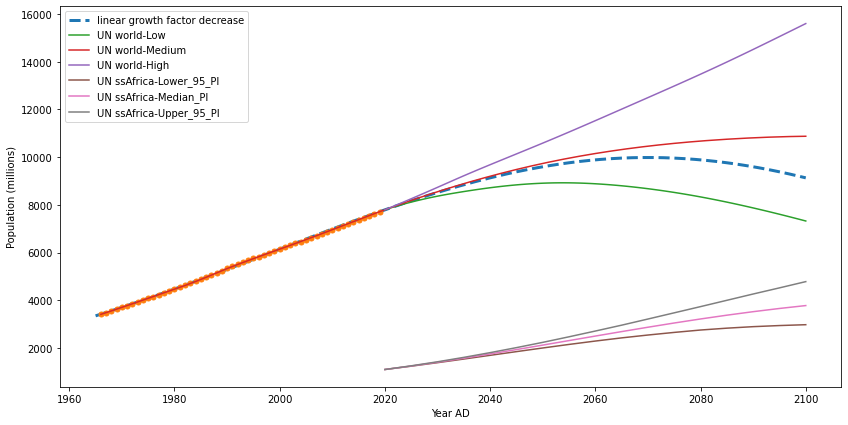

In [5]:
plt.figure(figsize=[14,7])

A = kModelParameters[0]
B = kModelParameters[1]
# Find constant of integration - fix value at year 2019
i = (t == 2019)
C = np.log(N[i]) - (A * 2019**2 / 2) - B*2019

def populationPrediction(t,A,B,C):
    return np.exp(A*t**2 / 2 + B*t + C)

tModel = np.arange(1965,2101,1)
NModel = populationPrediction(tModel,A,B,C)

plt.plot(tModel,NModel,linewidth=3,linestyle='dashed',label='linear growth factor decrease')
plt.plot(t[t > 1965],N[t > 1965],marker='o',markersize=5,linewidth=0)

# Add UN predictions for comparison
for name in ['world-Low','world-Medium','world-High','ssAfrica-Lower_95_PI',
             'ssAfrica-Median_PI','ssAfrica-Upper_95_PI']:
    
    filename = dataDir + 'UN2019-population-projection-' + name + '.csv'
    un = np.genfromtxt(filename, delimiter=',', names=True)
    sel = (un['Time'] > 1965)
    plt.plot(un['Time'][sel], un['PopTotal'][sel]/1000, label='UN '+ name)

plt.legend()
plt.xlabel('Year AD')
plt.ylabel('Population (millions)')
plt.show()

The result is a little more optimistic (earlier and smaller peak) than the United Nations medium-variant prediction, but not significantly. Most of the growth and uncertainty relates to sub-Sahara Africa. However, predicting the future is difficult and  dependent on current trends in global prosperity and well-being continuing, and particularly trends in female educational attainment and access to contraception (e.g. Vollset et al. 2020). Human choices are very different when they feel uncertain about their future - as shown by the existing correlation between fertility rates and economic prosperity.

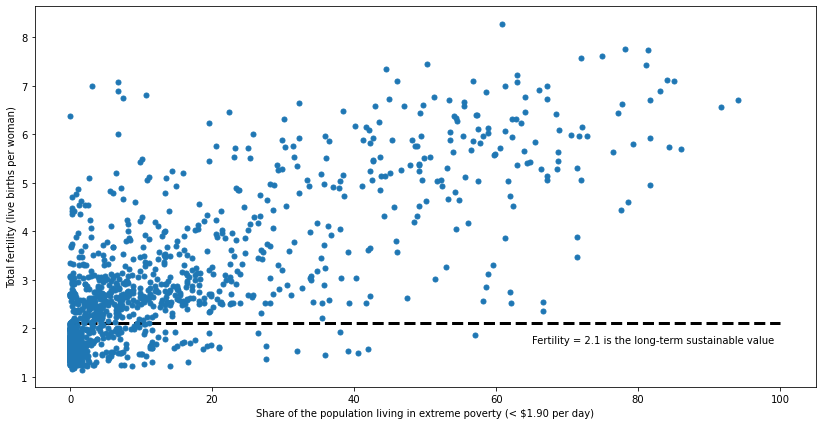

In [6]:
# Data file from ourworldindata.org
filename = dataDir + 'fertility-rate-vs-the-share-living-in-extreme-poverty.csv'
fertility,poverty = np.genfromtxt(filename,usecols=(3,4),skip_header=1,unpack=True,delimiter=',',filling_values=-9999)

selection = (fertility > 0) & (fertility < 100) & (poverty > -1)

plt.figure(figsize=[14,7])
plt.plot([0,100],[2.1,2.1],linewidth=3,linestyle='--',color='black')
plt.plot(poverty[selection],fertility[selection],marker='o',markersize=5,linewidth=0)
plt.xlabel('Share of the population living in extreme poverty (< $1.90 per day)')
plt.ylabel('Total fertility (live births per woman)')
plt.text(65,1.7,"Fertility = 2.1 is the long-term sustainable value")
plt.show()

---
**For further information**

https://en.wikipedia.org/wiki/Population_growth

United Nations, Department of Economic and Social Affairs, Population Division (2019). World Population Prospects 2019: Highlights (ST/ESA/SER.A/423).
https://www.un.org/development/desa/pd/  
https://population.un.org/wpp/Download/Standard/CSV/

Vollset, S. E., Goren, E., Yuan, C. W., Cao, J., Smith, A. E., Hsiao, T., ... & Dolgert, A. J. (2020). Fertility, mortality, migration, and population scenarios for 195 countries and territories from 2017 to 2100: a forecasting analysis for the Global Burden of Disease Study. The Lancet. 
https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30677-2/fulltext

https://ourworldindata.org/  
https://ourworldindata.org/grapher/fertility-rate-vs-the-share-living-in-extreme-poverty

